In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [133]:
child_mortality_pop_growth = pd.read_csv('data/child-mortality-vs-population-growth.csv')
obese_adults_percentage = pd.read_csv('data/share-of-adults-defined-as-obese.csv')
cancer_percentage = pd.read_csv('data/share-of-population-with-cancer.csv')
child_mortality = pd.read_csv('data/child-deaths-igme-data.csv')
life_expectancy = pd.read_csv('data/life-expectancy.csv')
obesity_mortality = pd.read_csv('data/death-rate-from-obesity.csv')
overweight_child = pd.read_csv('data/children-who-are-overweight-sdgs.csv')
population = pd.read_csv('data/population.csv')
population_density = pd.read_csv('data/population-density-3.csv')
hiv_cases = pd.read_csv('data/new-cases-of-hiv-infection.csv')
alcohol_consumption_per_capita = pd.read_csv('data/total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')
school_years = pd.read_csv('data/mean-years-of-schooling-long-run.csv')
human_development_index = pd.read_csv('data/human-development-index.csv')
gdp_per_capita = pd.read_csv('data/gdp_per_capita.csv')
infant_mortality = pd.read_csv('data/number-of-infant-deaths.csv')
aids_mortality = pd.read_csv('data/deaths-from-aids-ihme.csv')
cocaine_mortality = pd.read_csv('data/death-rates-cocaine.csv')
opioids_mortality = pd.read_csv('data/death-rate-from-opioid-use.csv')
amphetamine_mortality = pd.read_csv('data/death-rate-amphetamine.csv')
disorders_mortality = pd.read_csv('data/death-rates-from-drug-use-disorders.csv')
tobacco_percentage = pd.read_csv('data/prevalence-of-tobacco-use-sdgs.csv')
smoking_mortality = pd.read_csv('data/death-rate-smoking.csv')

In [134]:
def missing_percentage(df):
    df = df.append(df.sum(numeric_only=True), ignore_index=True)
    return df['Null'].max() / (df['Non-Null'].max() + df['Null'].max())

def columns_info(df):
    non_null = []
    null = []
    unique = []

    for col in df.columns:
        non_null.append(df[col].count())
        null.append(df[col].isna().sum())
        unique.append(df[col].nunique())

    columns_df = pd.DataFrame(list(zip(df.columns.to_list(), non_null, null, unique)), 
                              columns = ['Column', 'Non-Null', 'Null', 'Count_Unique'])

    return columns_df

def html_table(df):
    count = len(df.columns.to_list())
    ph = count
    
    print('<table>')
    print('\t<tr>')
    for col in df.columns:
        print(f'\t\t<th>{col}</th>')
    print('\t</tr>')
    for index, row in df.iterrows():
        for i in range(len(row)):
            if count % ph == 0:
                print('\t<tr>')

            print(f'\t\t<td>{row[i]}</td>') 
            count += 1 

            if count % ph == 0:
                print('\t</tr>')
    print('</table>')

## Data Cleaning 

In [135]:
df_dict = {
          'child_mortality_pop_growth': {'df': child_mortality_pop_growth},
          'obese_adults_percentage': {'df': obese_adults_percentage},
          'cancer_percentage': {'df': cancer_percentage},
          'child_mortality': {'df': child_mortality},
          'life_expectancy': {'df': life_expectancy},
          'obesity_mortality': {'df': obesity_mortality}, 
          'overweight_child': {'df': overweight_child},
          'population': {'df': population},
          'population_density': {'df': population_density},
          'hiv_cases': {'df': hiv_cases},
          'alcohol_consumption_per_capita': {'df': alcohol_consumption_per_capita},
          'school_years': {'df': school_years},
          'human_development_index': {'df': human_development_index},
          'gdp_per_capita': {'df': gdp_per_capita},
          'infant_mortality': {'df': infant_mortality}, 
          'aids_mortality': {'df': aids_mortality},
          'cocaine_mortality': {'df': cocaine_mortality},
          'opioids_mortality': {'df': opioids_mortality},
          'amphetamine_mortality': {'df': amphetamine_mortality},
          'disorders_mortality': {'df': disorders_mortality},
          'tobacco_percentage': {'df': tobacco_percentage},
          'smoking_mortality': {'df': smoking_mortality}
         }

df_names_list = []
shape_list = []
count_na_list = []
cols_list = []

for name, frame in df_dict.items():
    df_names_list.append(name)
    shape_list.append(frame['df'].shape)
    count_na_list.append(frame['df'].isna().sum().sum())
    cols_list.append(frame['df'].columns)

df_info = pd.DataFrame(list(zip(df_names_list, shape_list, count_na_list, cols_list)),
                                columns=['df_name', 'shape', 'count_na', 'column_names'])

df_info

,df_name,shape,count_na,column_names
0,child_mortality_pop_growth,"(49980, 7)",121641,"Index(['Entity', 'Code', 'Year', 'Estim..."
1,obese_adults_percentage,"(8316, 4)",336,"Index(['Entity', 'Code', 'Year', 'Preva..."
2,cancer_percentage,"(6468, 4)",980,"Index(['Entity', 'Code', 'Year', 'Preva..."
3,child_mortality,"(11487, 4)",1470,"Index(['Entity', 'Code', 'Year', 'Number of un..."
4,life_expectancy,"(19028, 4)",583,"Index(['Entity', 'Code', 'Year', 'Life expecta..."
5,obesity_mortality,"(6468, 4)",980,"Index(['Entity', 'Code', 'Year', 'Death..."
6,overweight_child,"(1128, 4)",0,"Index(['Entity', 'Code', 'Year', 'Indic..."
7,population,"(48497, 4)",1848,"Index(['Entity', 'Code', 'Year', 'Total popula..."
8,population_density,"(9744, 4)",0,"Index(['Entity', 'Code', 'Year', 'Popul..."
9,hiv_cases,"(6468, 4)",980,"Index(['Entity', 'Code', 'Year', 'Incid..."


In [136]:
for name, frame in df_dict.items():
    if frame['df'].shape[1] == 4:
        frame['df'].drop(['Code'], axis=1, inplace=True)
        frame['df'].columns = ['country', 'year', name]

child_mortality_pop_growth.drop(['Estimates, 1950 - 2020: Annually interpolated demographic indicators - Rate of natural increase (per 1,000 population)', 
                                  'Total population (Gapminder, HYDE & UN)', 'Continent', 'Code'], 
                                  axis=1, inplace=True)
child_mortality_pop_growth.columns = ['country', 'year', 'child_mortality_per_thousand']

In [137]:
gdp_per_capita.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
gdp_per_capita.rename(columns={'Country Name': 'country'}, inplace=True)

gdp_per_capita_new = pd.DataFrame()

for country in gdp_per_capita['country']:
    country_df = gdp_per_capita[gdp_per_capita['country'] == country]
    country_df.drop('country', axis=1, inplace=True)
    country_df = country_df.T
    country_df['country'] = country
    country_df.columns = ['gdp_per_capita', 'country']
    gdp_per_capita_new = gdp_per_capita_new.append(country_df)

#overwritting previous gdp df and moving year from index
gdp_per_capita = gdp_per_capita_new.reset_index().rename(columns={'index': 'year'})
gdp_per_capita['year'] = gdp_per_capita['year'].astype('int64')
df_dict['gdp_per_capita']['df'] = gdp_per_capita

In [138]:
df = pd.DataFrame(columns=['country', 'year'])

for name, frame in df_dict.items():
    df = pd.merge(df, frame['df'], how='outer', left_on=['country', 'year'], 
                  right_on=['country', 'year'])

df.head()

,country,year,child_mortality_per_thousand,obese_adults_percentage,cancer_percentage,child_mortality,life_expectancy,obesity_mortality,overweight_child,population,...,human_development_index,gdp_per_capita,infant_mortality,aids_mortality,cocaine_mortality,opioids_mortality,amphetamine_mortality,disorders_mortality,tobacco_percentage,smoking_mortality
0,Abkhazia,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,41.6952,NaN,NaN,NaN,27.638,NaN,NaN,7752117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,41.4045,NaN,NaN,NaN,27.878,NaN,NaN,7840151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,40.8172,NaN,NaN,NaN,28.361,NaN,NaN,7935996.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,40.2182,NaN,NaN,NaN,28.852,NaN,NaN,8039684.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
columns_info(df).style.set_properties(**{'border': '1px solid black'}).hide_index().set_precision(2).bar()

Column,Non-Null,Null,Count_Unique
country,63177,0,453
year,63177,0,363
child_mortality_per_thousand,17220,45957,16400
obese_adults_percentage,8316,54861,506
cancer_percentage,6468,56709,6468
child_mortality,11487,51690,8713
life_expectancy,19028,44149,15300
obesity_mortality,6468,56709,6468
overweight_child,1128,62049,1108
population,48497,14680,45558


In [140]:
missing_percentage(columns_info(df))

0.7760181711698878

In [141]:
df.drop(['overweight_child', 'alcohol_consumption_per_capita', 'tobacco_percentage'], 
         axis=1, inplace=True)

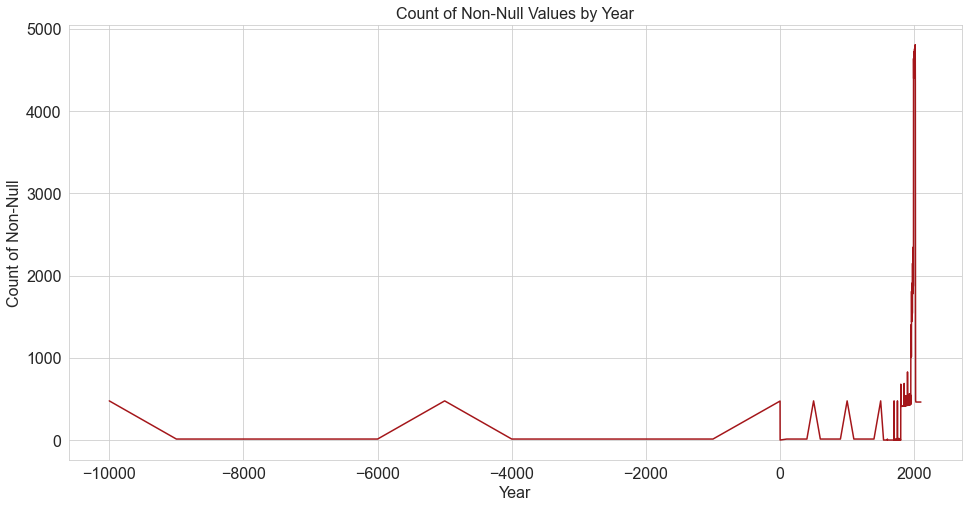

In [142]:
year_pivot = df.groupby('year').count()
year_pivot['non_null_count'] = year_pivot.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(year_pivot.index, year_pivot['non_null_count'], color='#A4161A')
plt.title('Count of Non-Null Values by Year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Count of Non-Null', fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('life_expectancy_image_1.png', dpi = 400, facecolor="#F5F3F4", bbox_inches='tight')
plt.show()

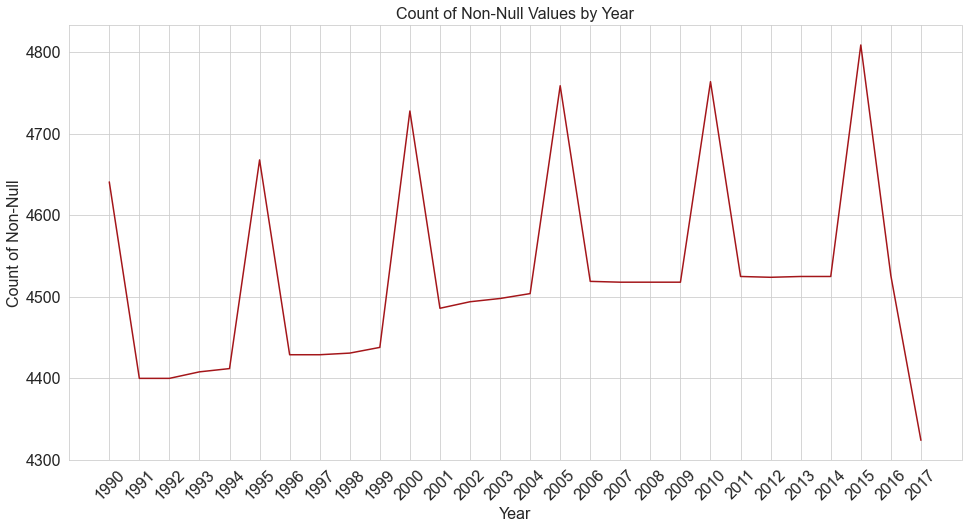

In [143]:
df = df[df['year'].between(1990, 2017)]

year_pivot = df.groupby('year').count()
year_pivot['non_null_count'] = year_pivot.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(year_pivot.index, year_pivot['non_null_count'], color='#A4161A')
plt.title('Count of Non-Null Values by Year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(year_pivot.index, fontsize=16, rotation=45)
plt.ylabel('Count of Non-Null', fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('life_expectancy_image_2.png', dpi = 400, facecolor="#F5F3F4", bbox_inches='tight')
plt.show()

In [144]:
columns_info(df).style.set_properties(**{'border': '1px solid black'}).hide_index().set_precision(2).bar()

Column,Non-Null,Null,Count_Unique
country,11298,0,453
year,11298,0,28
child_mortality_per_thousand,6888,4410,6582
obese_adults_percentage,5346,5952,497
cancer_percentage,6468,4830,6468
child_mortality,6748,4550,5295
life_expectancy,6804,4494,6101
obesity_mortality,6468,4830,6468
population,6804,4494,6781
population_density,1392,9906,1372


In [145]:
missing_percentage(columns_info(df))

0.4182788356978479

In [146]:
df.drop(['population_density'], axis=1, inplace=True)

In [147]:
#country_df = df[['country']].drop_duplicates()
#country_df.to_csv('country.csv', index=False)

In [148]:
country_df = pd.read_csv('country.csv')
df = df[df['country'].isin(country_df['country'].to_list())]
columns_info(df).style.set_properties(**{'border': '1px solid black'}).hide_index().set_precision(2).bar()

Column,Non-Null,Null,Count_Unique
country,6496,0,232
year,6496,0,28
child_mortality_per_thousand,5600,896,5367
obese_adults_percentage,5103,1393,491
cancer_percentage,5432,1064,5432
child_mortality,5376,1120,4026
life_expectancy,6496,0,5860
obesity_mortality,5432,1064,5432
population,6496,0,6473
hiv_cases,5432,1064,5432


In [149]:
missing_percentage(columns_info(df))

0.14814501231527094

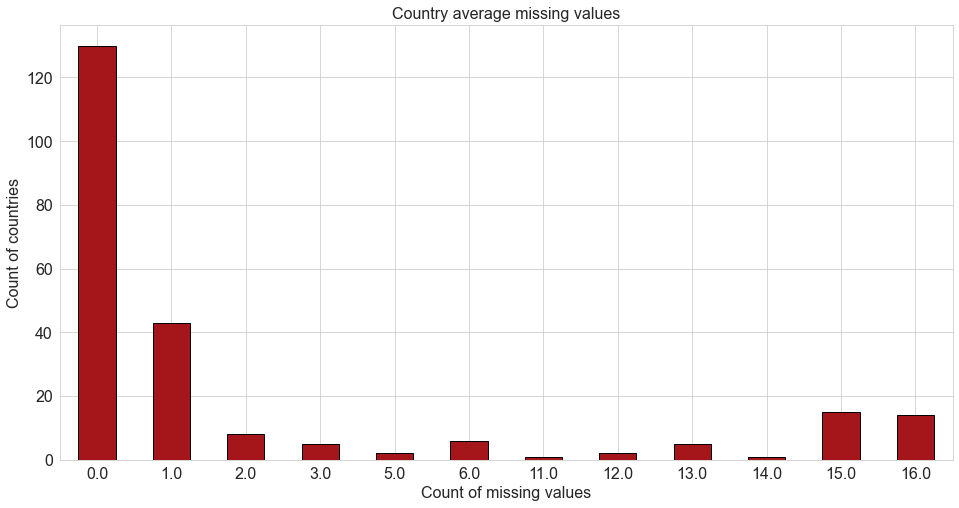

In [150]:
df['total_na'] = df.isnull().sum(axis=1)
missing_total_pivot = df.groupby('country').mean()[['total_na']].sort_values(by='total_na', 
                                                                          ascending=False)
missing_total_pivot['total_na_int'] = missing_total_pivot['total_na'].round(0)

fig, ax = plt.subplots(figsize=(16,8))
missing_total_pivot['total_na_int'].value_counts().sort_index().plot.bar(color='#A4161A', 
                                                                         edgecolor='black')
plt.title('Country average missing values', fontsize=16)
plt.xlabel('Count of missing values', fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.ylabel('Count of countries', fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('life_expectancy_image_3.png', dpi = 400, facecolor="#F5F3F4", bbox_inches='tight')
plt.show()

In [151]:
high_missing_list = []
missing_count_list = [11, 12, 13, 14, 15, 16]

for i in missing_count_list:
    temp_df = missing_total_pivot[missing_total_pivot['total_na_int'] == i]
    high_missing_list.append(temp_df.index.to_list())

missing_countries_df = pd.DataFrame(list(zip(missing_count_list, high_missing_list)),
                          columns=['average_missing_count', 'countries'])

missing_countries_df

,average_missing_count,countries
0,11,[Palau]
1,12,"[Saint Kitts and Nevis, Tuvalu]"
2,13,"[Liechtenstein, San Marino, Monaco, Hong Kong,..."
3,14,[Aruba]
4,15,"[Turks and Caicos Islands, Isle of Man, Niue, ..."
5,16,"[Saint Helena, Saint Pierre and Miquelon, Brit..."


In [152]:
df = df[~df['country'].isin(missing_total_pivot[missing_total_pivot['total_na'] > 10].index.to_list())]
columns_info(df).style.set_properties(**{'border': '1px solid black'}).hide_index().set_precision(2).bar()

Column,Non-Null,Null,Count_Unique
country,5432,0,194
year,5432,0,28
child_mortality_per_thousand,5236,196,5057
obese_adults_percentage,4941,491,412
cancer_percentage,5432,0,5432
child_mortality,5208,224,4024
life_expectancy,5432,0,4975
obesity_mortality,5432,0,5432
population,5432,0,5431
hiv_cases,5432,0,5432


In [153]:
missing_percentage(columns_info(df))

0.030743740795287185

## Exploratory Data Analysis 

In [154]:
df.describe().round(2)

,year,child_mortality_per_thousand,obese_adults_percentage,cancer_percentage,child_mortality,life_expectancy,obesity_mortality,population,hiv_cases,school_years,human_development_index,gdp_per_capita,infant_mortality,aids_mortality,cocaine_mortality,opioids_mortality,amphetamine_mortality,disorders_mortality,smoking_mortality,total_na
count,5432.00,5236.00,4941.00,5432.00,5208.00,5432.00,5432.00,5.432000e+03,5432.00,4704.00,4662.00,4558.00,5208.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00
mean,2003.50,5.16,13.91,0.99,47371.44,68.13,83.58,3.309398e+07,13036.24,7.37,0.65,10408.84,33666.27,6781.69,0.05,0.84,0.04,1.37,101.01,0.65
std,8.08,5.51,8.84,0.78,194861.59,9.70,46.99,1.276114e+08,46140.40,3.17,0.17,16409.27,140204.52,24590.25,0.08,0.95,0.05,1.32,49.10,1.35
min,1990.00,0.18,0.30,0.19,2.00,26.17,10.10,4.536100e+04,0.00,0.29,0.20,22.80,2.00,0.00,0.00,0.04,0.00,0.06,15.85,0.00
25%,1996.75,1.14,5.70,0.46,504.00,61.95,47.43,1.808888e+06,75.39,4.70,0.52,897.72,420.00,16.39,0.01,0.30,0.01,0.58,63.53,0.00
50%,2003.50,2.75,14.00,0.65,3901.50,70.71,73.67,6.832610e+06,602.90,7.70,0.68,3150.94,3218.50,163.21,0.03,0.55,0.02,0.97,93.26,0.00
75%,2010.25,7.81,19.80,1.29,31514.25,75.19,110.61,2.156611e+07,5479.55,10.00,0.78,12218.98,23116.00,2144.80,0.06,0.99,0.04,1.64,130.99,1.00
max,2017.00,41.65,52.90,5.42,3419688.00,84.29,320.19,1.421022e+09,665512.31,14.10,0.95,118823.65,2400555.00,320241.44,1.12,13.34,0.54,18.75,347.37,7.00


In [155]:
html_table(df.describe().round(2))

<table>
	<tr>
		<th>year</th>
		<th>child_mortality_per_thousand</th>
		<th>obese_adults_percentage</th>
		<th>cancer_percentage</th>
		<th>child_mortality</th>
		<th>life_expectancy</th>
		<th>obesity_mortality</th>
		<th>population</th>
		<th>hiv_cases</th>
		<th>school_years</th>
		<th>human_development_index</th>
		<th>gdp_per_capita</th>
		<th>infant_mortality</th>
		<th>aids_mortality</th>
		<th>cocaine_mortality</th>
		<th>opioids_mortality</th>
		<th>amphetamine_mortality</th>
		<th>disorders_mortality</th>
		<th>smoking_mortality</th>
		<th>total_na</th>
	</tr>
	<tr>
		<td>5432.0</td>
		<td>5236.0</td>
		<td>4941.0</td>
		<td>5432.0</td>
		<td>5208.0</td>
		<td>5432.0</td>
		<td>5432.0</td>
		<td>5432.0</td>
		<td>5432.0</td>
		<td>4704.0</td>
		<td>4662.0</td>
		<td>4558.0</td>
		<td>5208.0</td>
		<td>5432.0</td>
		<td>5432.0</td>
		<td>5432.0</td>
		<td>5432.0</td>
		<td>5432.0</td>
		<td>5432.0</td>
		<td>5432.0</td>
	</tr>
	<tr>
		<td>2003.5</td>
		<td>5.16</td>
		<td>13.9

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 41 to 49825
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       5432 non-null   object 
 1   year                          5432 non-null   int64  
 2   child_mortality_per_thousand  5236 non-null   float64
 3   obese_adults_percentage       4941 non-null   float64
 4   cancer_percentage             5432 non-null   float64
 5   child_mortality               5208 non-null   float64
 6   life_expectancy               5432 non-null   float64
 7   obesity_mortality             5432 non-null   float64
 8   population                    5432 non-null   float64
 9   hiv_cases                     5432 non-null   float64
 10  school_years                  4704 non-null   float64
 11  human_development_index       4662 non-null   float64
 12  gdp_per_capita                4558 non-null   float64
 13  i

In [157]:
df.drop(['total_na'], axis=1, inplace=True)

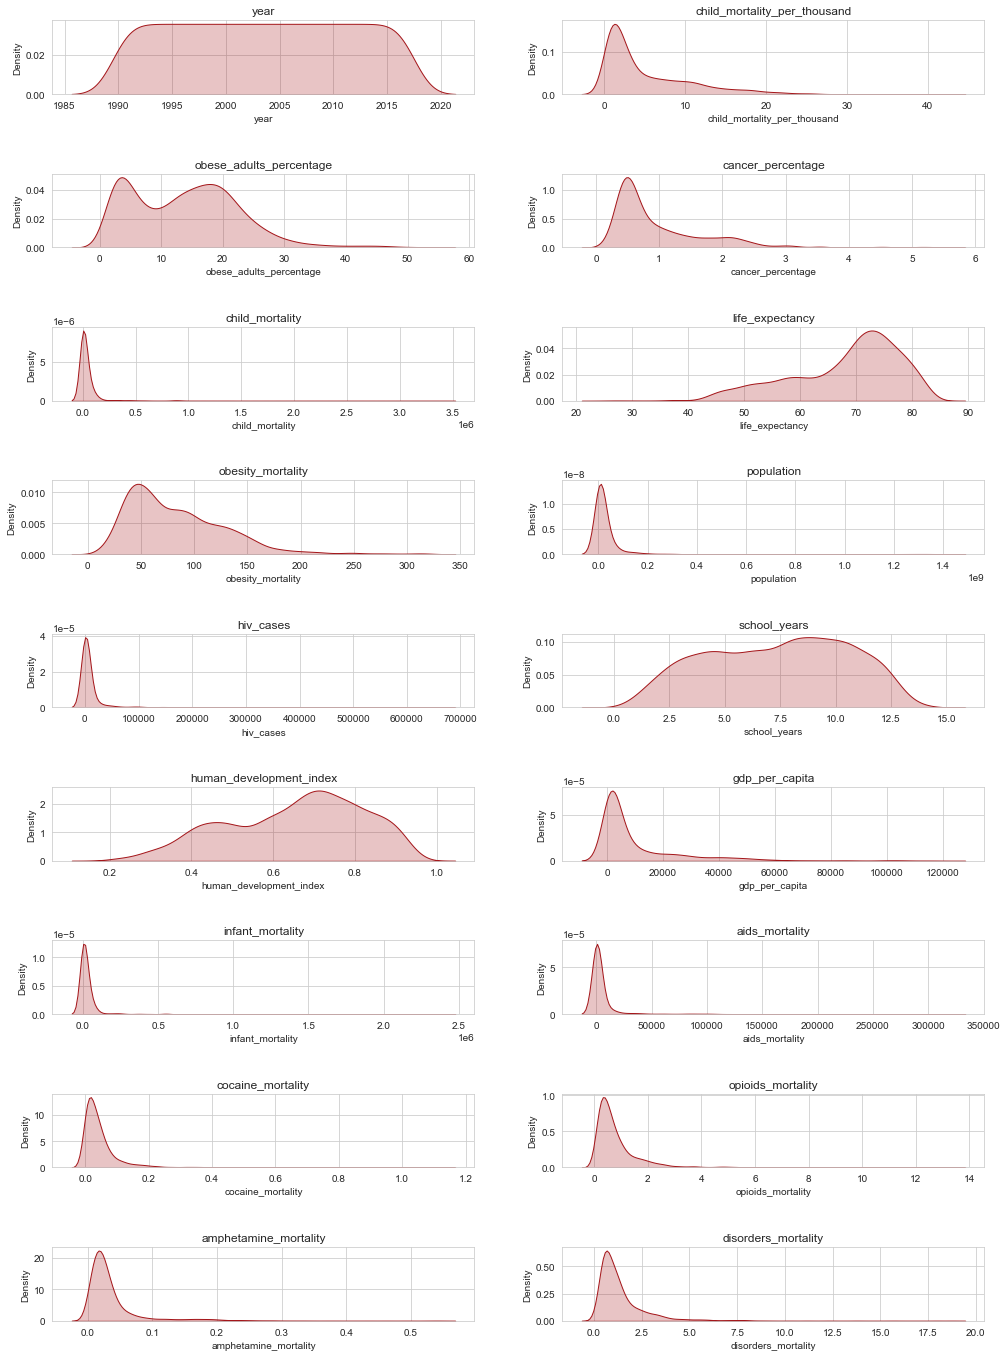

In [158]:
numeric_cols = df.select_dtypes(['int64', 'float64']).columns
cols = 2 
rows = int(len(numeric_cols)/cols)

fig, ax = plt.subplots(figsize=(15, 20), nrows = rows, ncols = cols)
fig.tight_layout(pad = 6)

count = 0 

for i in range(rows):
    for j in range(cols):
        ax[i, j].set_title(numeric_cols[count])
        sns.kdeplot(df[numeric_cols[count]], ax = ax[i][j], shade = True, color='#A4161A')
        count += 1
        
plt.savefig('life_expectancy_image_4.png', dpi = 400, facecolor="#F5F3F4", bbox_inches='tight')

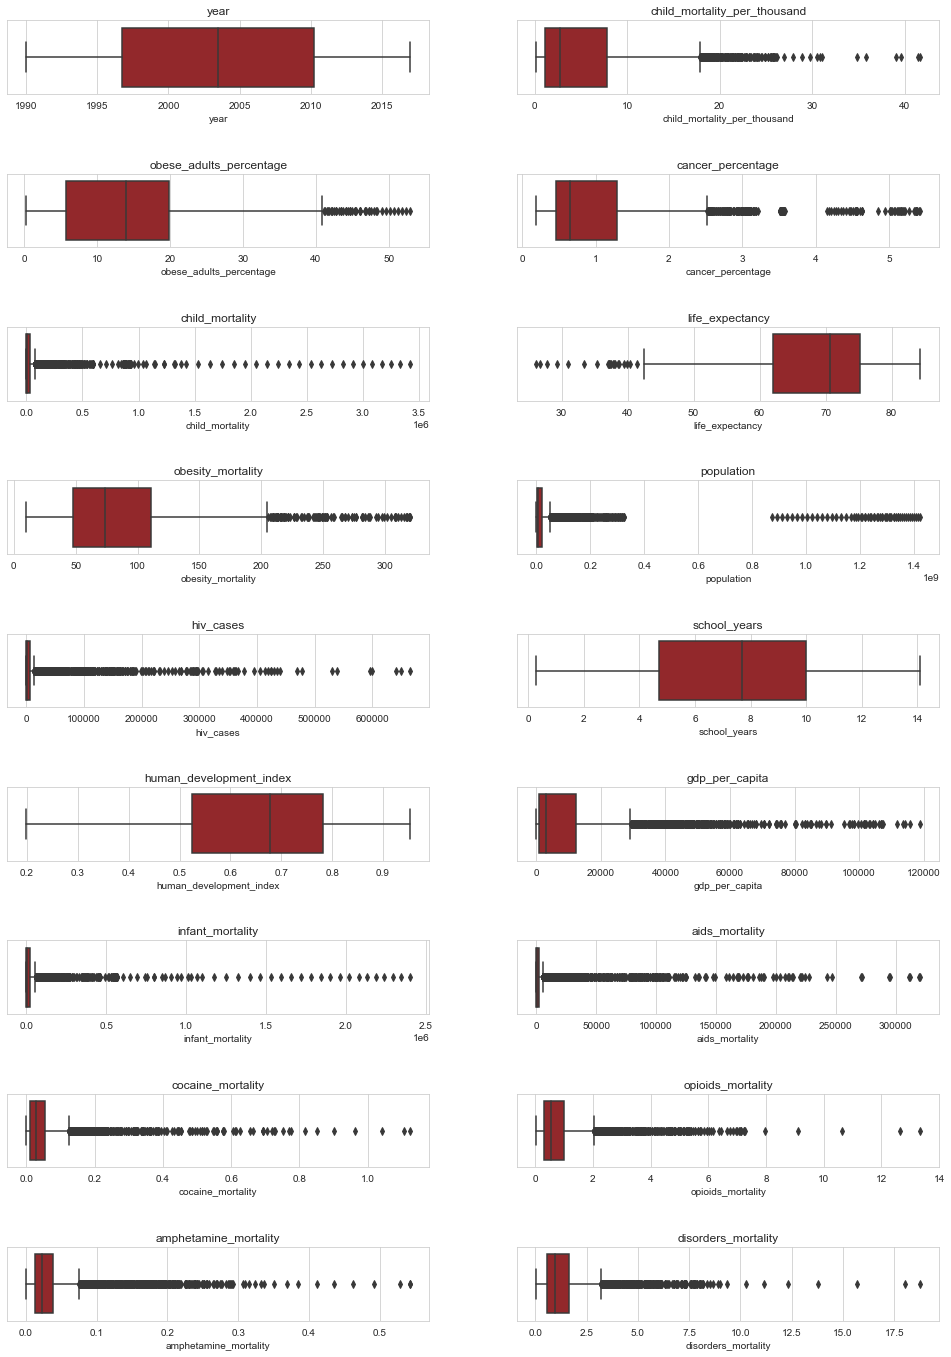

In [159]:
cols = 2 
rows = int(len(numeric_cols) / cols)

fig, ax = plt.subplots(figsize=(15, 20), nrows = rows, ncols = cols)
fig.tight_layout(pad = 6)

count = 0 

for i in range(rows):
    for j in range(cols):
        ax[i, j].set_title(numeric_cols[count])
        sns.boxplot(df[numeric_cols[count]], ax = ax[i][j], color='#A4161A')
        count += 1
        
plt.savefig('life_expectancy_image_5.png', dpi = 400, facecolor="#F5F3F4", bbox_inches='tight')

In [160]:
outlier_list = []

for col in numeric_cols:
    upper_q, lower_q = np.percentile(df[col], [75, 25])
    iqr = upper_q - lower_q
    min_val = lower_q - (iqr*1.5)
    max_val = upper_q + (iqr*1.5)
    outlier_count = len((np.where((df[col] > max_val) | (df[col] < min_val))[0]))
    outlier_percent = round(outlier_count/len(df[col])*100, 2)
    outlier_list.append([col, outlier_count, outlier_percent])    

outlier_df = pd.DataFrame(outlier_list, columns=['column', 'outlier_count', 'outlier_percent'])
outlier_df = outlier_df[outlier_df['outlier_count'] > 0]
outlier_df

,column,outlier_count,outlier_percent
3,cancer_percentage,209,3.85
5,life_expectancy,21,0.39
6,obesity_mortality,109,2.01
7,population,650,11.97
8,hiv_cases,785,14.45
13,aids_mortality,896,16.49
14,cocaine_mortality,442,8.14
15,opioids_mortality,441,8.12
16,amphetamine_mortality,558,10.27
17,disorders_mortality,419,7.71


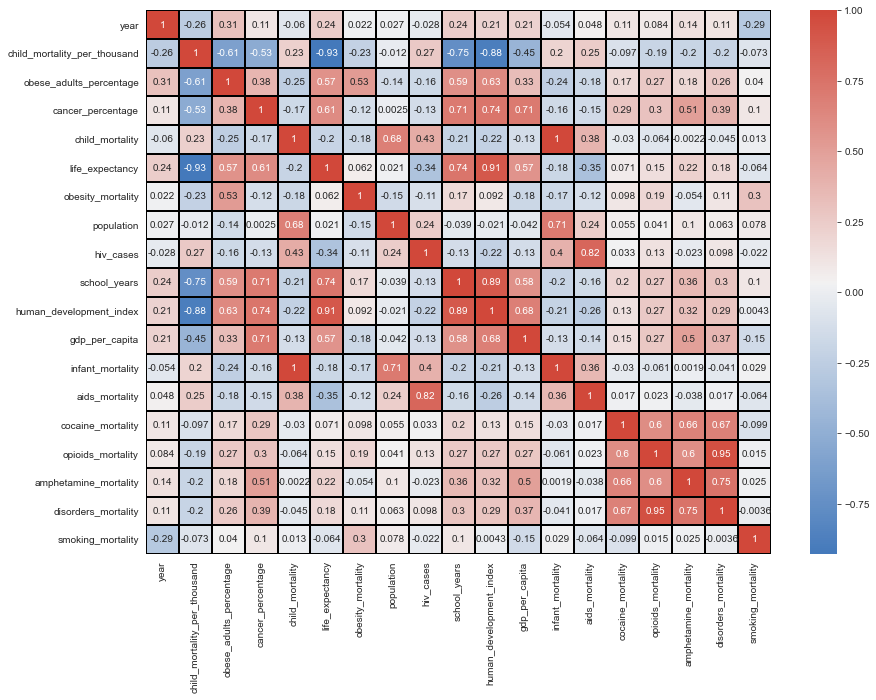

In [161]:
plt.figure(figsize=(14,10))
corr = df.corr()
cmap = sns.diverging_palette(250, 15, n=1000, as_cmap=True)
sns.heatmap(corr, cmap = cmap, linewidth=1, linecolor='black',
          annot=True)

plt.savefig('life_expectancy_image_6.png', dpi = 400, facecolor="#F5F3F4", bbox_inches='tight')

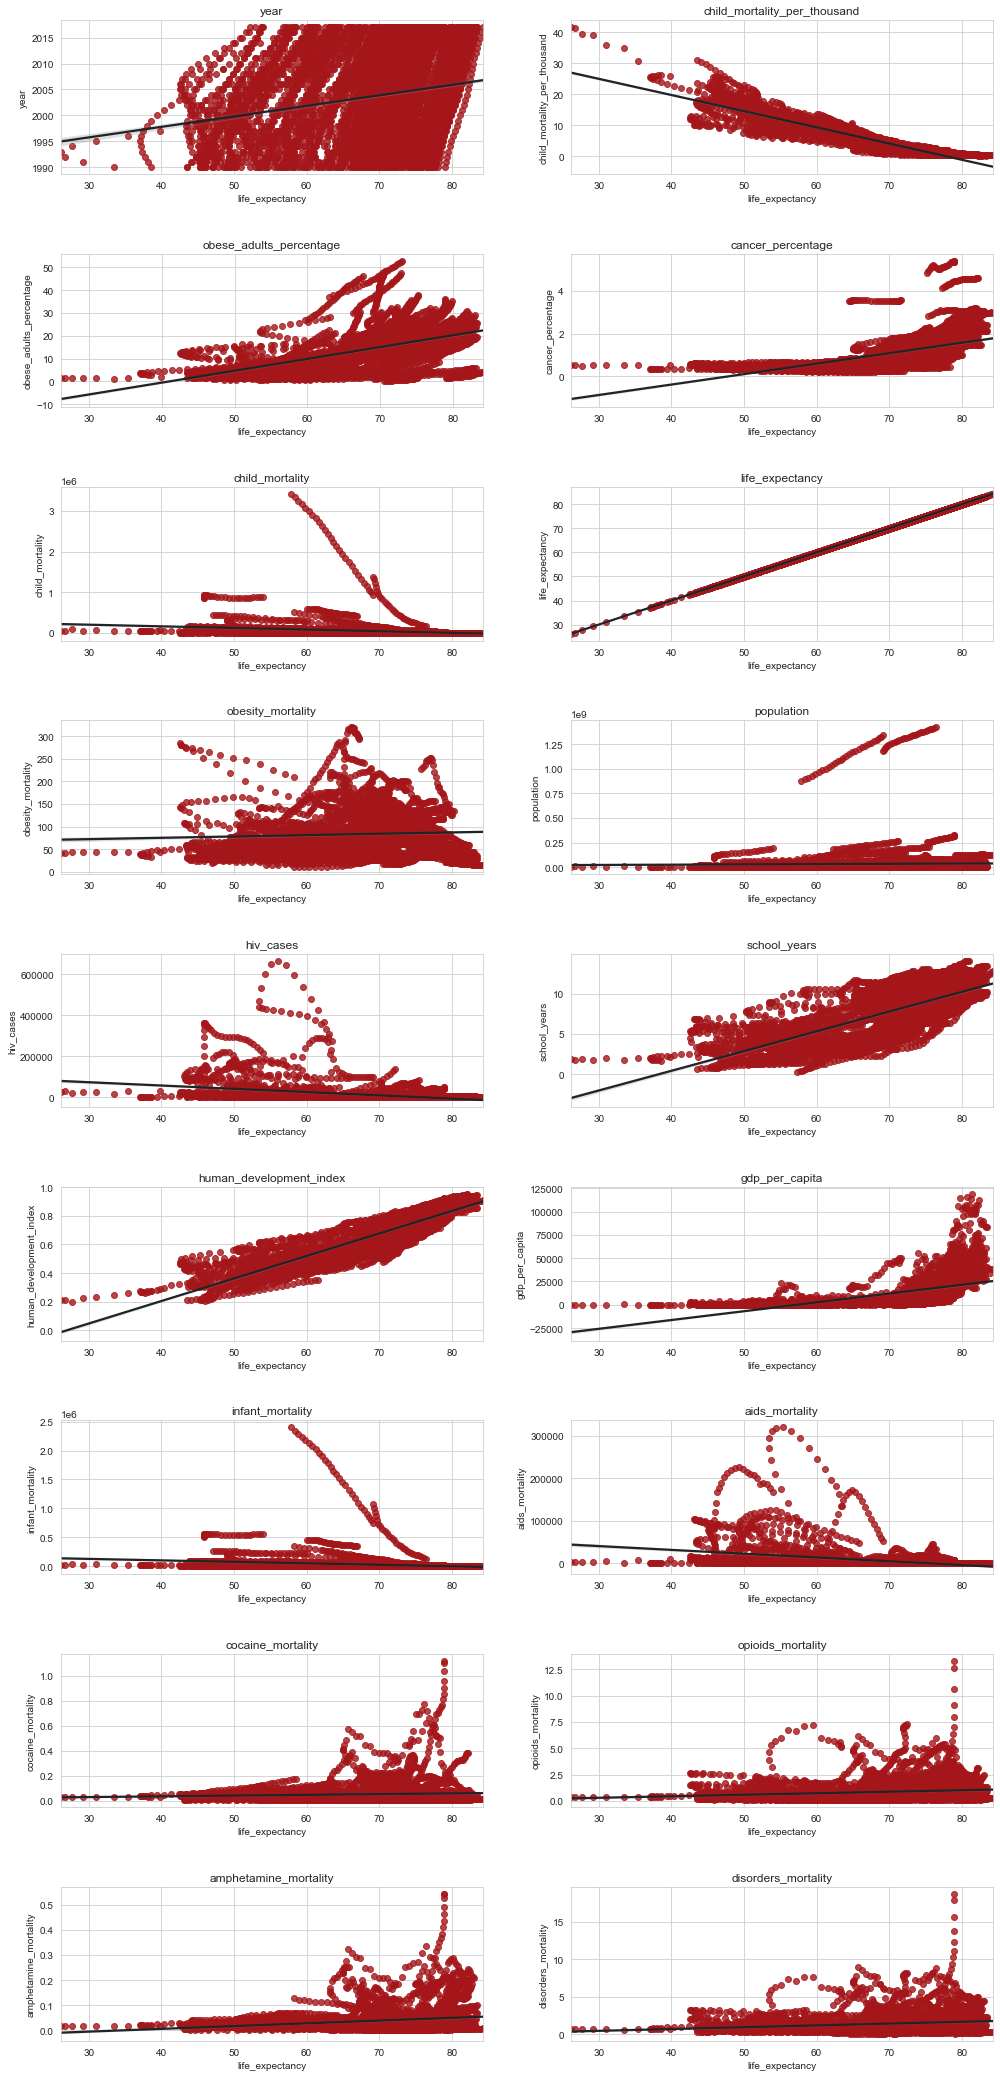

In [162]:
cols = 2 
rows = int(len(numeric_cols) / cols)

fig, ax = plt.subplots(figsize=(15, 30), 
                       nrows = rows,
                       ncols = cols)
fig.tight_layout(pad = 6)

count = 0 

for i in range(rows):
    for j in range(cols):
        ax[i, j].set_title(numeric_cols[count])
        sns.regplot(x=df['life_expectancy'], y=df[numeric_cols[count]], data=df, ax = ax[i][j], color='#A4161A',
                    scatter_kws={'color': '#A4161A'}, line_kws={'color': '#212427'})
        count += 1
        
plt.savefig('life_expectancy_image_7.png', dpi = 400, facecolor="#F5F3F4", bbox_inches='tight')

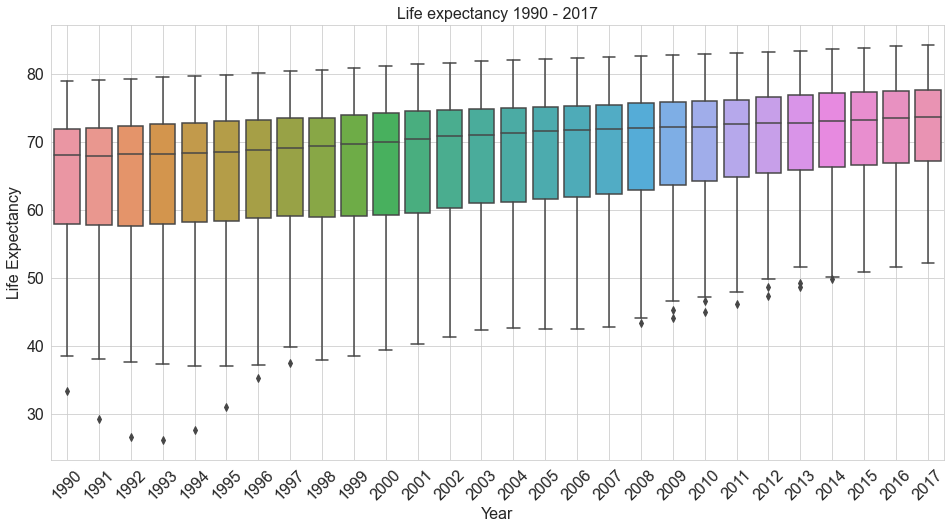

In [163]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=df['year'], y=df['life_expectancy'])
plt.title('Life expectancy 1990 - 2017', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel('Life Expectancy', fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)

plt.savefig('life_expectancy_image_8.png', dpi = 400, facecolor="#F5F3F4", bbox_inches='tight')

## Models & Tuning 

In [164]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance

In [165]:
grid_model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params' : {
        }
    },
    'lasso_regression': {
        'model': Lasso(),
        'params' : {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'normalize': [True, False]
        }
    },
    'elastic_net': {
        'model': ElasticNet(),
        'params': {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        }
    },
    'ridge_regression': {
        'model': Ridge(),
        'params': {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    }
}

rand_model_params = {
    'desicison_tree_regression': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth' : [1, 3, 5, 7, 9, 11, 13, 15, 17],
            'min_samples_leaf': [1, 2, 3, 4, 5],
            'max_features': ['auto', 'log2', 'sqrt', None],
            'max_leaf_nodes': [None, 10, 20, 30]
        }
    },
    'random_forest_regression': {
        'model': RandomForestRegressor(),
        'params': {
            'max_depth': [11, 13, 15, 17],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4, 5],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [2, 4, 6, 8, 10]
        }
    },
    'gradient_boosting_regression': {
        'model': GradientBoostingRegressor(),
        'params': {
            'max_depth' : [1, 3, 5, 7, 9, 11, 13, 15, 17],
            'min_samples_leaf': [1, 2, 3, 4, 5],
            'max_features': ['auto', 'log2', 'sqrt', None],
            'max_leaf_nodes': [None, 10, 20, 30]
        }
    },
}

In [166]:
def hyper_tuning(grid_model_params, rand_model_params, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    scores = []
    feature_importance = []

    for model_name, mp in grid_model_params.items():
        model = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
        model.fit(X_train, y_train)
        scores.append({
            'model': model_name,
            'best_score': model.best_score_,
            'best_params': model.best_params_,
            'r2': (r2_score(y_test, model.predict(X_test))),
            'RMSE': (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))),
            'MAE': (mean_absolute_error(y_test, model.predict(X_test))),
            'MSE': (mean_squared_error(y_test, model.predict(X_test)))
        })

    for model_name, mp in rand_model_params.items():
        model = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True, n_jobs=20)
        model.fit(X_train, y_train)
        scores.append({
            'model': model_name,
            'best_score': model.best_score_,
            'best_params': model.best_params_,
            'r2': (r2_score(y_test, model.predict(X_test))),
            'RMSE': (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))),
            'MAE': (mean_absolute_error(y_test, model.predict(X_test))),
            'MSE': (mean_squared_error(y_test, model.predict(X_test)))
        })
        feature_importance.append(permutation_importance(model, X_test, y_test))
        
    scores_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'r2', 'RMSE', 'MAE', 'MSE'])
    return scores_df, feature_importance

In [167]:
df.drop(['country', 'human_development_index', 'disorders_mortality', 'hiv_cases'], axis=1, inplace=True)

In [168]:
from sklearn.impute import KNNImputer

df_knn = df.copy()
imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
X = df_knn.drop(['life_expectancy'], axis=1)
y = df_knn['life_expectancy']

scores_df_knn, feature_importance_df_knn = hyper_tuning(grid_model_params, rand_model_params, X, y)
scores_df_knn

,model,best_score,best_params,r2,RMSE,MAE,MSE
0,linear_regression,0.935810,{},0.926952,2.482947,1.820482,6.165027
1,lasso_regression,0.935802,"{'alpha': 0.001, 'normalize': False}",0.926867,2.484387,1.824538,6.172178
2,elastic_net,0.935804,"{'alpha': 0.001, 'l1_ratio': 0.9}",0.926862,2.484466,1.824459,6.172570
3,ridge_regression,0.935811,{'alpha': 0.1},0.926948,2.483012,1.820634,6.165348
4,desicison_tree_regression,0.930026,"{'min_samples_leaf': 1, 'max_leaf_nodes': 20, ...",0.924947,2.516784,1.944356,6.334199
5,random_forest_regression,0.987560,"{'n_estimators': 8, 'min_samples_split': 10, '...",0.987891,1.010910,0.659909,1.021939
6,gradient_boosting_regression,0.994501,"{'min_samples_leaf': 2, 'max_leaf_nodes': None...",0.996347,0.555282,0.359500,0.308338


In [169]:
html_table(scores_df_knn.round(5))

<table>
	<tr>
		<th>model</th>
		<th>best_score</th>
		<th>best_params</th>
		<th>r2</th>
		<th>RMSE</th>
		<th>MAE</th>
		<th>MSE</th>
	</tr>
	<tr>
		<td>linear_regression</td>
		<td>0.93581</td>
		<td>{}</td>
		<td>0.92695</td>
		<td>2.48295</td>
		<td>1.82048</td>
		<td>6.16503</td>
	</tr>
	<tr>
		<td>lasso_regression</td>
		<td>0.9358</td>
		<td>{'alpha': 0.001, 'normalize': False}</td>
		<td>0.92687</td>
		<td>2.48439</td>
		<td>1.82454</td>
		<td>6.17218</td>
	</tr>
	<tr>
		<td>elastic_net</td>
		<td>0.9358</td>
		<td>{'alpha': 0.001, 'l1_ratio': 0.9}</td>
		<td>0.92686</td>
		<td>2.48447</td>
		<td>1.82446</td>
		<td>6.17257</td>
	</tr>
	<tr>
		<td>ridge_regression</td>
		<td>0.93581</td>
		<td>{'alpha': 0.1}</td>
		<td>0.92695</td>
		<td>2.48301</td>
		<td>1.82063</td>
		<td>6.16535</td>
	</tr>
	<tr>
		<td>desicison_tree_regression</td>
		<td>0.93003</td>
		<td>{'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_features': 'auto', 'max_depth': 5}</td>
		<td>0.92495</td>
		<td>2.

In [170]:
df_dropna = df.copy()
df_dropna.dropna(inplace=True)

X = df_dropna.drop(['life_expectancy'], axis=1)
y = df_dropna['life_expectancy']

scores_df_dropna, feature_importance_df_dropna = hyper_tuning(grid_model_params, rand_model_params, X, y)
scores_df_dropna

,model,best_score,best_params,r2,RMSE,MAE,MSE
0,linear_regression,0.936002,{},0.938576,2.428924,1.732663,5.899670
1,lasso_regression,0.936036,"{'alpha': 0.001, 'normalize': False}",0.938581,2.428831,1.733481,5.899220
2,elastic_net,0.936036,"{'alpha': 0.001, 'l1_ratio': 1}",0.938581,2.428831,1.733481,5.899220
3,ridge_regression,0.936004,{'alpha': 0.1},0.938581,2.428827,1.732110,5.899199
4,desicison_tree_regression,0.942099,"{'min_samples_leaf': 5, 'max_leaf_nodes': 30, ...",0.946173,2.273751,1.724249,5.169943
5,random_forest_regression,0.988825,"{'n_estimators': 8, 'min_samples_split': 10, '...",0.992916,0.824848,0.584288,0.680374
6,gradient_boosting_regression,0.995437,"{'min_samples_leaf': 2, 'max_leaf_nodes': 30, ...",0.996436,0.585111,0.437375,0.342355


In [171]:
html_table(scores_df_dropna.round(5))

<table>
	<tr>
		<th>model</th>
		<th>best_score</th>
		<th>best_params</th>
		<th>r2</th>
		<th>RMSE</th>
		<th>MAE</th>
		<th>MSE</th>
	</tr>
	<tr>
		<td>linear_regression</td>
		<td>0.936</td>
		<td>{}</td>
		<td>0.93858</td>
		<td>2.42892</td>
		<td>1.73266</td>
		<td>5.89967</td>
	</tr>
	<tr>
		<td>lasso_regression</td>
		<td>0.93604</td>
		<td>{'alpha': 0.001, 'normalize': False}</td>
		<td>0.93858</td>
		<td>2.42883</td>
		<td>1.73348</td>
		<td>5.89922</td>
	</tr>
	<tr>
		<td>elastic_net</td>
		<td>0.93604</td>
		<td>{'alpha': 0.001, 'l1_ratio': 1}</td>
		<td>0.93858</td>
		<td>2.42883</td>
		<td>1.73348</td>
		<td>5.89922</td>
	</tr>
	<tr>
		<td>ridge_regression</td>
		<td>0.936</td>
		<td>{'alpha': 0.1}</td>
		<td>0.93858</td>
		<td>2.42883</td>
		<td>1.73211</td>
		<td>5.8992</td>
	</tr>
	<tr>
		<td>desicison_tree_regression</td>
		<td>0.9421</td>
		<td>{'min_samples_leaf': 5, 'max_leaf_nodes': 30, 'max_features': 'auto', 'max_depth': 5}</td>
		<td>0.94617</td>
		<td>2.27375<

In [172]:
df_intp = df.copy()
df_intp = df_intp.interpolate(method='linear', limit_direction='both')

X = df_intp.drop(['life_expectancy'], axis=1)
y = df_intp['life_expectancy']

scores_df_intp, feature_importance_df_intp = hyper_tuning(grid_model_params, rand_model_params, X, y)
scores_df_intp

,model,best_score,best_params,r2,RMSE,MAE,MSE
0,linear_regression,0.890220,{},0.870755,3.302697,2.236166,10.907810
1,lasso_regression,0.890192,"{'alpha': 0.001, 'normalize': False}",0.870556,3.305234,2.238743,10.924574
2,elastic_net,0.890205,"{'alpha': 0.001, 'l1_ratio': 0.7}",0.870499,3.305965,2.239974,10.929405
3,ridge_regression,0.890233,{'alpha': 1},0.870661,3.303902,2.237937,10.915767
4,desicison_tree_regression,0.926578,"{'min_samples_leaf': 1, 'max_leaf_nodes': 20, ...",0.925296,2.510931,1.941679,6.304773
5,random_forest_regression,0.986349,"{'n_estimators': 6, 'min_samples_split': 5, 'm...",0.988998,0.963604,0.637294,0.928533
6,gradient_boosting_regression,0.995089,"{'min_samples_leaf': 4, 'max_leaf_nodes': None...",0.996938,0.508359,0.328643,0.258429


In [173]:
html_table(scores_df_intp.round(5))

<table>
	<tr>
		<th>model</th>
		<th>best_score</th>
		<th>best_params</th>
		<th>r2</th>
		<th>RMSE</th>
		<th>MAE</th>
		<th>MSE</th>
	</tr>
	<tr>
		<td>linear_regression</td>
		<td>0.89022</td>
		<td>{}</td>
		<td>0.87076</td>
		<td>3.3027</td>
		<td>2.23617</td>
		<td>10.90781</td>
	</tr>
	<tr>
		<td>lasso_regression</td>
		<td>0.89019</td>
		<td>{'alpha': 0.001, 'normalize': False}</td>
		<td>0.87056</td>
		<td>3.30523</td>
		<td>2.23874</td>
		<td>10.92457</td>
	</tr>
	<tr>
		<td>elastic_net</td>
		<td>0.89021</td>
		<td>{'alpha': 0.001, 'l1_ratio': 0.7}</td>
		<td>0.8705</td>
		<td>3.30596</td>
		<td>2.23997</td>
		<td>10.9294</td>
	</tr>
	<tr>
		<td>ridge_regression</td>
		<td>0.89023</td>
		<td>{'alpha': 1}</td>
		<td>0.87066</td>
		<td>3.3039</td>
		<td>2.23794</td>
		<td>10.91577</td>
	</tr>
	<tr>
		<td>desicison_tree_regression</td>
		<td>0.92658</td>
		<td>{'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_features': None, 'max_depth': 5}</td>
		<td>0.9253</td>
		<td>2.510

In [174]:
def stacked_bar_graph(column, xmin, xmax, major, title, file_name):
    stacked_bar_df = pd.DataFrame(columns=['model'])

    scores_df_knn_copy = scores_df_knn[['model', column]]
    scores_df_dropna_copy = scores_df_dropna[['model', column]]
    scores_df_intp_copy = scores_df_intp[['model', column]]

    for i in [scores_df_knn_copy, scores_df_dropna_copy, scores_df_intp_copy]:
        stacked_bar_df = pd.merge(stacked_bar_df, i, how='outer', right_on='model', left_on='model')

    stacked_bar_df.set_index('model', inplace=True)
    stacked_bar_df.columns = ['df_knn_best_scores', 'df_dropna_best_scores', 'df_df_intp_best_scores']

    stacked_bar_df.plot.barh(figsize=(16,8))
    plt.title(f'{title} Based on Imputation', fontsize=16)
    plt.xlabel(f'{title}', fontsize=16)
    plt.xticks(fontsize=16, rotation=45)
    plt.xlim(xmin, xmax)
    plt.xticks(np.linspace(xmin, xmax, num=major), fontsize=16)
    plt.ylabel('Model', fontsize=16)
    plt.yticks(fontsize=12)
    plt.legend(loc='best')
    plt.savefig(f'{file_name}.png', dpi = 400, facecolor="#F5F3F4", bbox_inches='tight')
    plt.show()
    pass

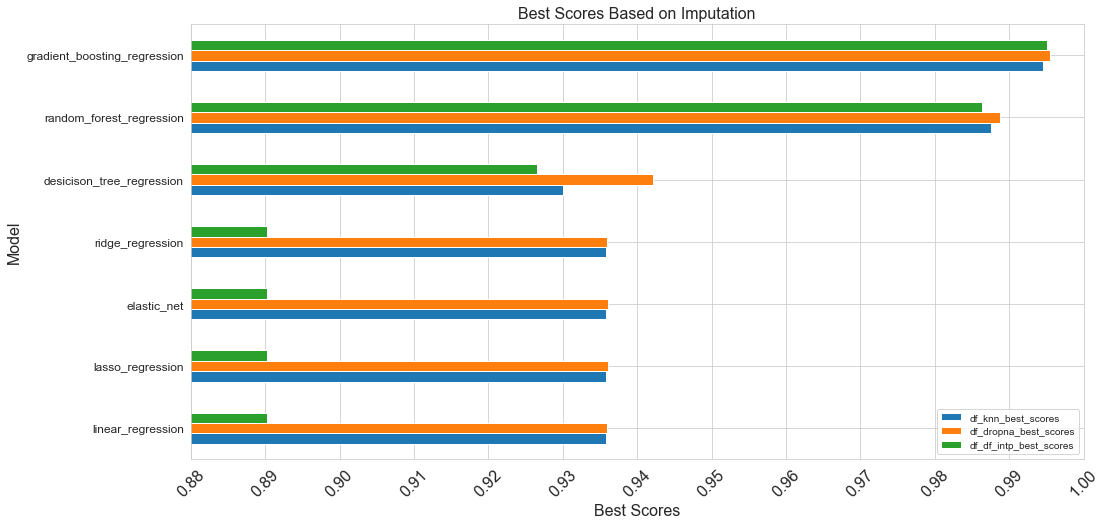

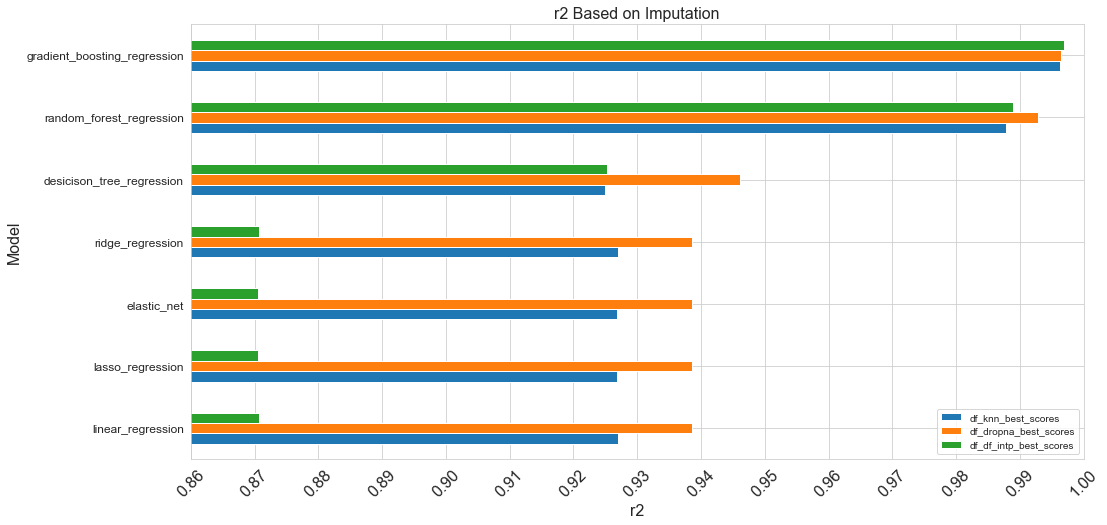

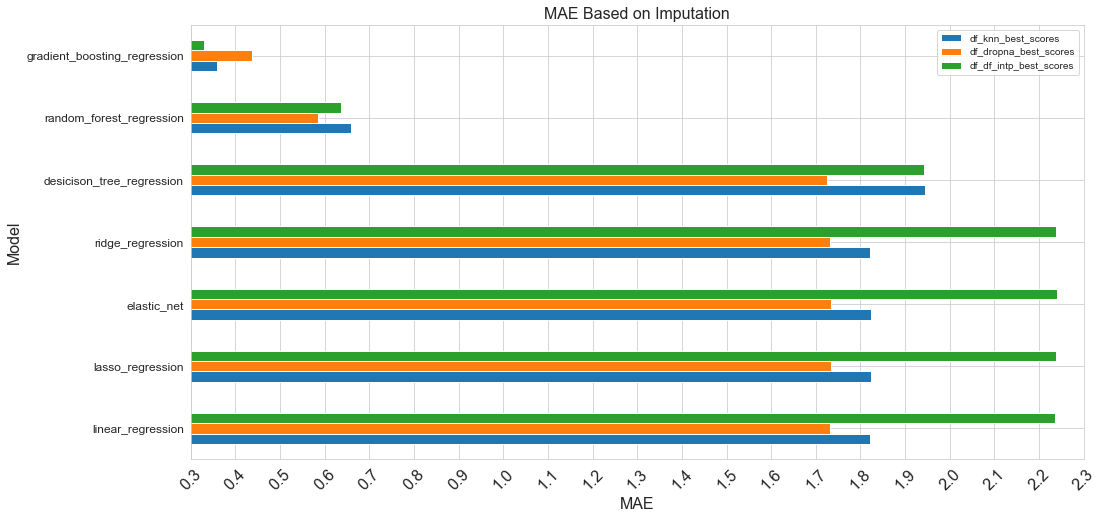

In [175]:
stacked_bar_graph('best_score', 0.88, 1, 13, 'Best Scores', 'life_expectancy_image_9')
stacked_bar_graph('r2', 0.86, 1, 15, 'r2', 'life_expectancy_image_10')
stacked_bar_graph('MAE', 0.3, 2.3, 21, 'MAE', 'life_expectancy_image_11')

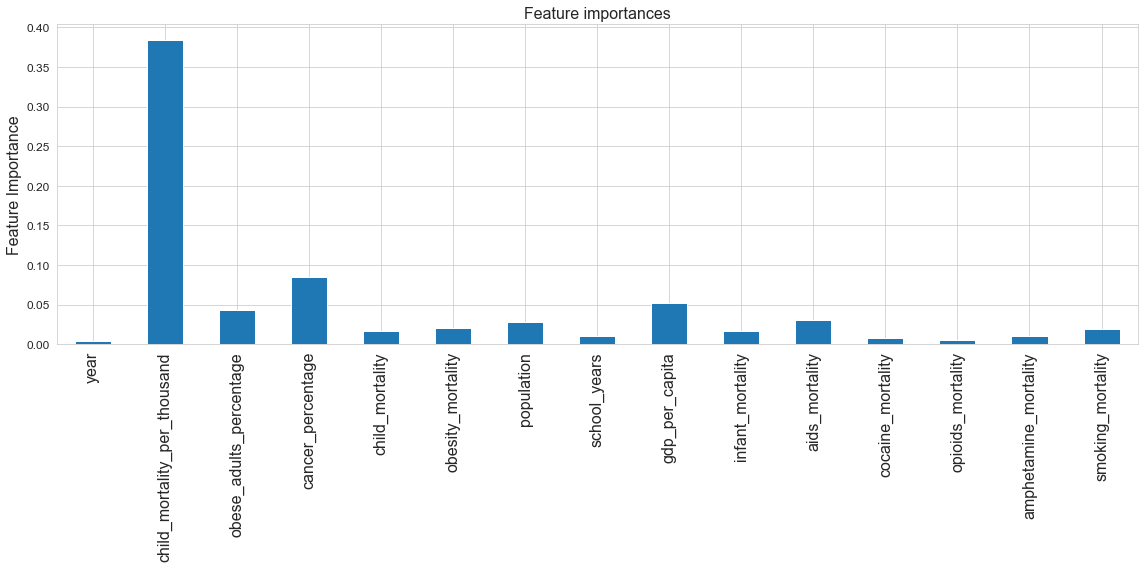

In [176]:
feature_importances_graph = pd.Series(feature_importance_df_intp[2]['importances_mean'], index=X.columns)
fig, ax = plt.subplots(figsize=(16,8))
feature_importances_graph.plot.bar()
plt.title('Feature importances', fontsize=16)
plt.ylabel('Feature Importance', fontsize=16)
plt.xticks(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
fig.tight_layout()
plt.savefig('life_expectancy_image_12.png', dpi = 400, facecolor="#F5F3F4", bbox_inches='tight')